In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
tickers = tickers.Symbol.to_list()

In [5]:
tickers = [i.replace(".","-") for i in tickers]
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

In [6]:
qualified = []
for i in tickers:
    data = yf.download(i,start = "2020-01-01")
    data["SMA10"] = data.Close.rolling(10).mean()
    data["SMA60"] = data.Close.rolling(60).mean()
    data["SMA150"] = data.Close.rolling(150).mean()
    data.dropna(inplace=True)
    if data.size!=0:
        if data.iloc[-1,-3] > data.iloc[-1,-2] and data.iloc[-1,-2] > data.iloc[-1,-1]:
            qualified.append(i)
print(qualified)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
selected_stocks = yf.download(qualified,start = "2010-01-01").dropna()
selected_stocks = selected_stocks.Close

[*********************100%***********************]  81 of 81 completed


In [8]:
selected_stocks.corr()

,ADP,AEP,AJG,ALB,AMT,APD,AVY,AZO,BF-B,BR,...,ULTA,UNH,VICI,VLO,VRTX,WEC,WM,WRB,XOM,XYL
ADP,1.000000,0.739292,0.926810,0.675597,0.796471,0.409304,0.495253,0.744121,0.777312,0.872436,...,0.518081,0.820304,0.753355,0.341069,0.704998,0.754834,0.917939,0.302845,0.493113,0.434440
AEP,0.739292,1.000000,0.732525,0.504882,0.589542,0.050663,0.059699,0.532710,0.362544,0.438230,...,0.538208,0.710358,0.485685,0.631411,0.636405,0.916136,0.864800,0.690894,0.668799,0.002161
AJG,0.926810,0.732525,1.000000,0.523934,0.748840,0.272704,0.353173,0.786852,0.736581,0.811497,...,0.607458,0.910792,0.679027,0.263028,0.755846,0.729061,0.874205,0.391454,0.394741,0.289584
ALB,0.675597,0.504882,0.523934,1.000000,0.581321,0.509690,0.504153,0.494937,0.586622,0.583200,...,0.369174,0.403224,0.694720,0.583877,0.467602,0.607881,0.604502,0.309766,0.674309,0.401443
AMT,0.796471,0.589542,0.748840,0.581321,1.000000,0.463056,0.372800,0.833442,0.750808,0.683471,...,0.456543,0.759684,0.782891,0.347294,0.814134,0.733267,0.672117,0.339278,0.483722,0.288729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEC,0.754834,0.916136,0.729061,0.607881,0.733267,0.232023,0.219192,0.662718,0.495294,0.488402,...,0.461319,0.720606,0.627211,0.641215,0.733088,1.000000,0.839495,0.610150,0.657986,0.105886
WM,0.917939,0.864800,0.874205,0.604502,0.672117,0.265477,0.415144,0.631433,0.634182,0.747618,...,0.491775,0.782137,0.664349,0.440743,0.643608,0.839495,1.000000,0.397506,0.545278,0.336105
WRB,0.302845,0.690894,0.391454,0.309766,0.339278,-0.255686,-0.423814,0.428990,0.080609,-0.099236,...,0.643302,0.430515,0.264555,0.788485,0.582152,0.610150,0.397506,1.000000,0.683256,-0.532565
XOM,0.493113,0.668799,0.394741,0.674309,0.483722,-0.029674,-0.073279,0.473248,0.405743,0.187786,...,0.546089,0.424320,0.637249,0.906083,0.596229,0.657986,0.545278,0.683256,1.000000,-0.212011


In [9]:
import seaborn as sns

<AxesSubplot:>

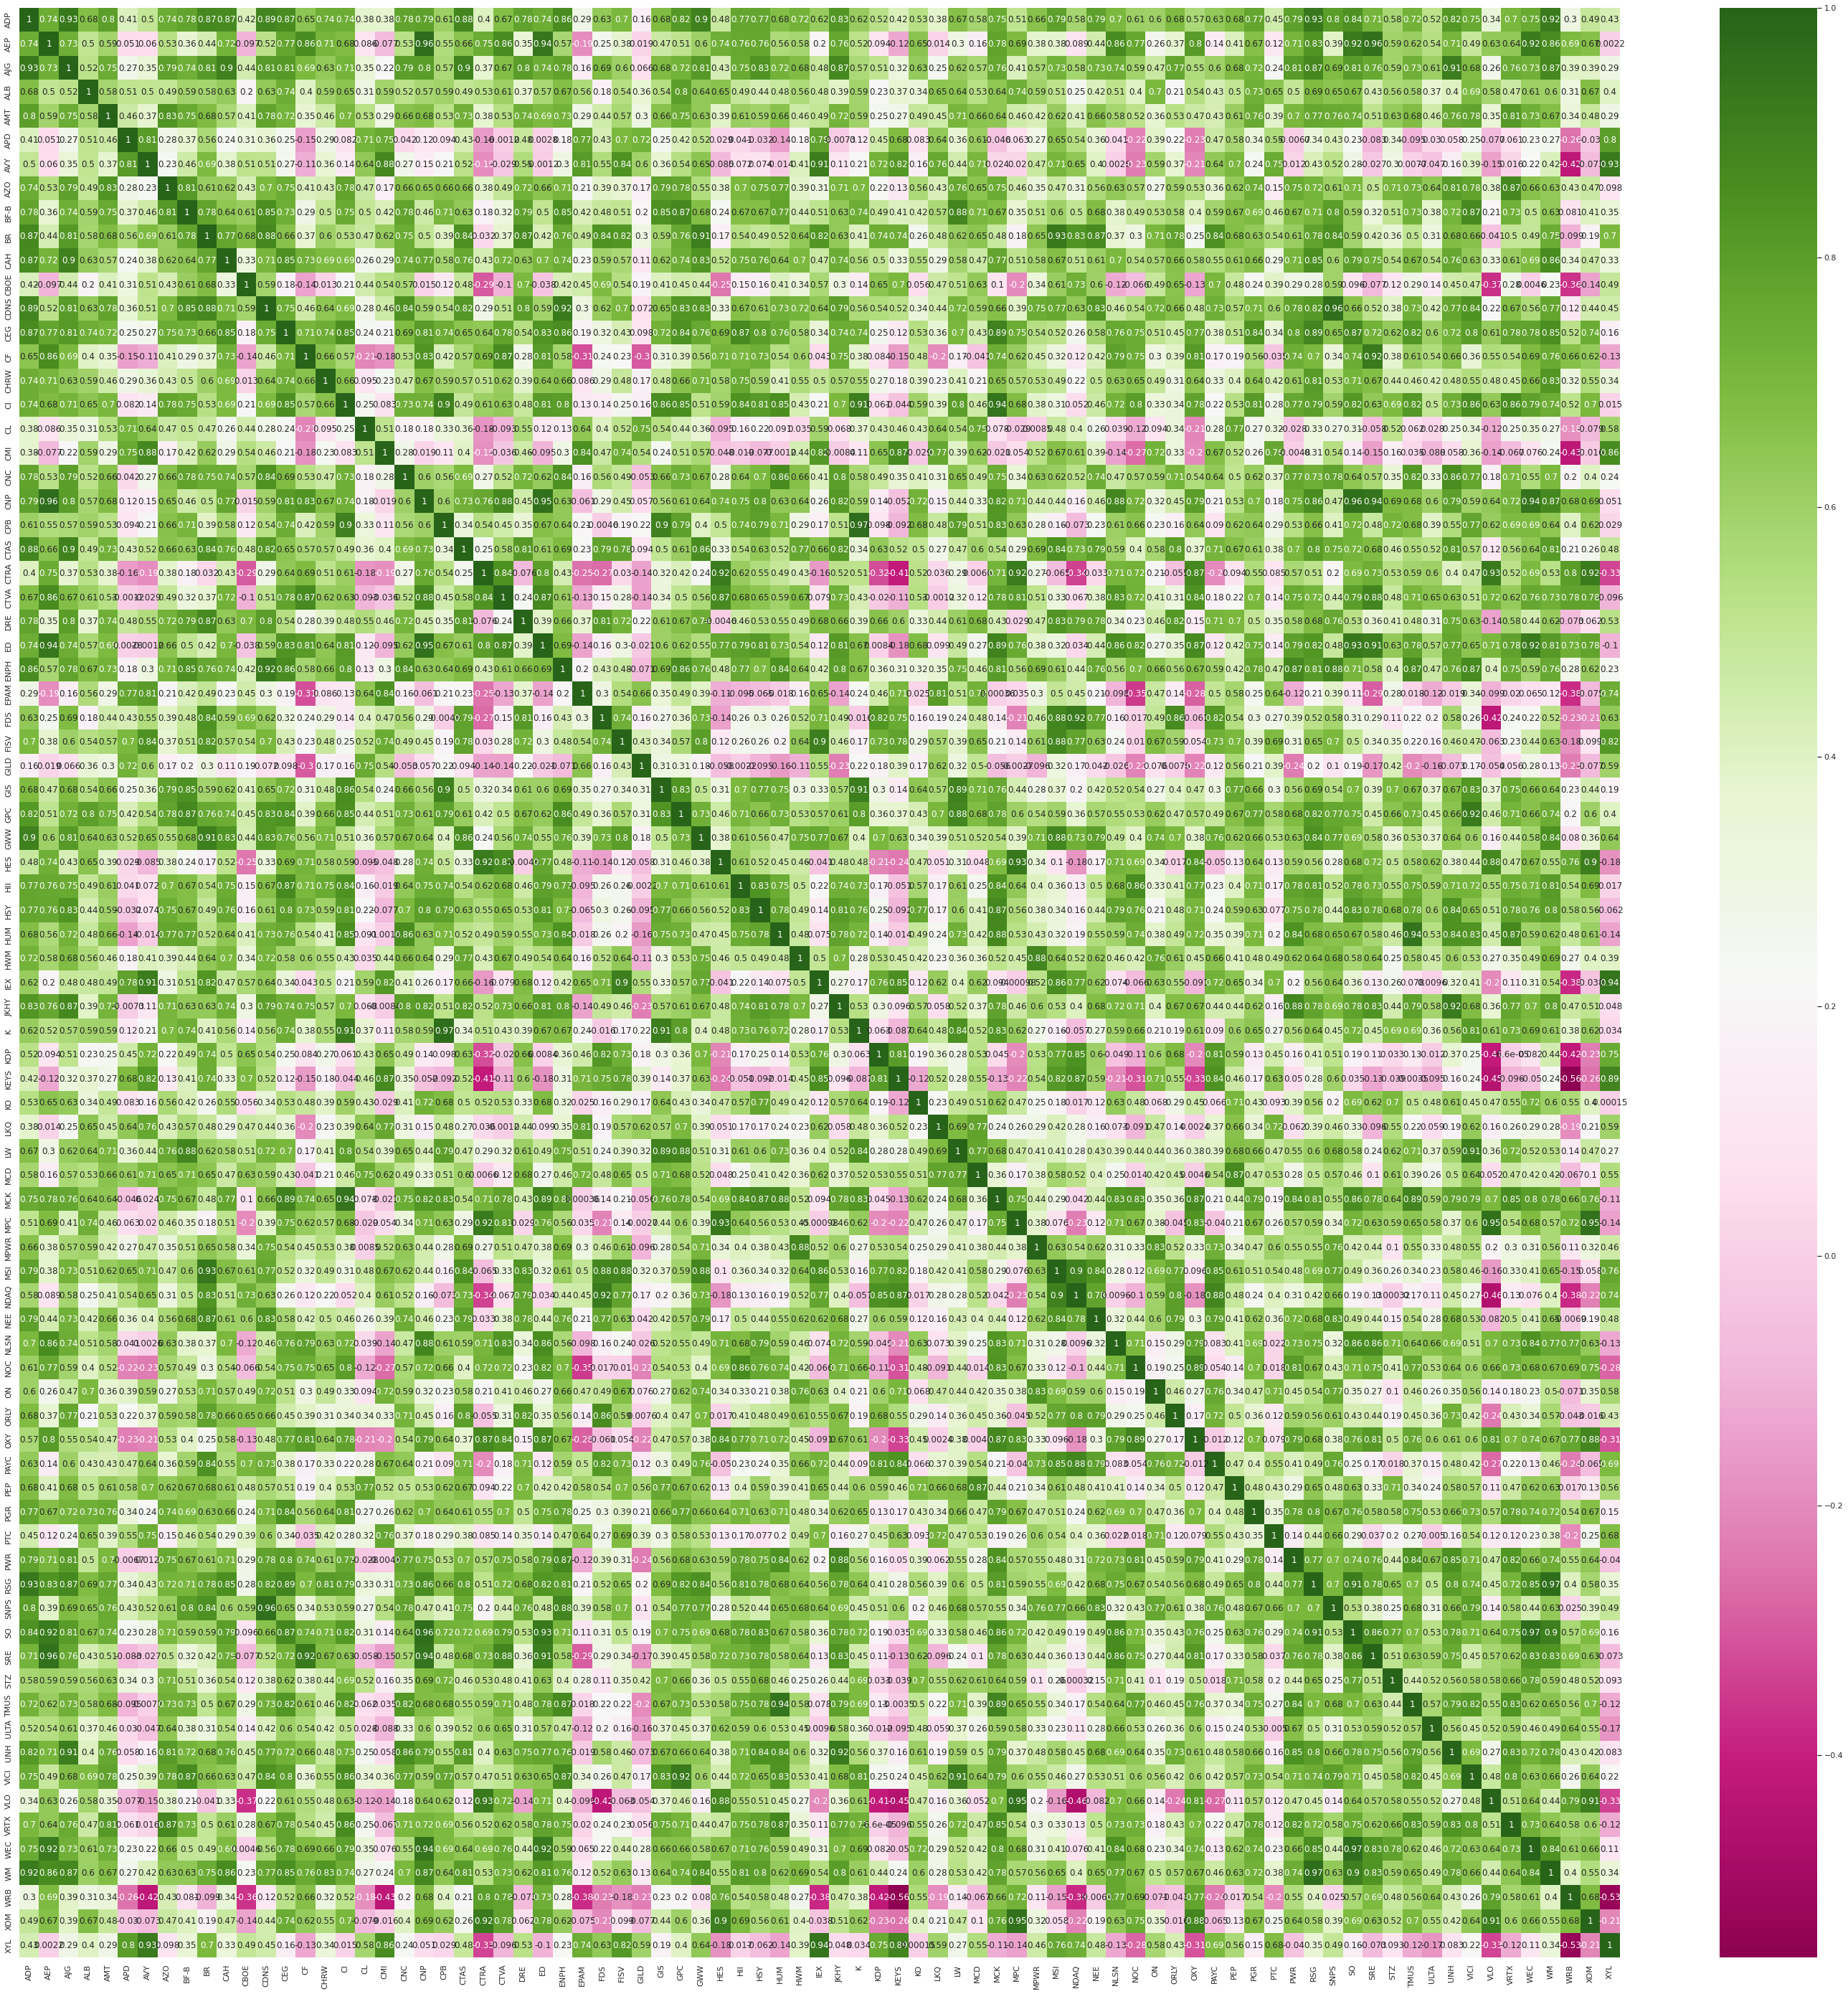

In [11]:
sns.set(rc={'figure.figsize':(50,50)})
sns.heatmap(selected_stocks.corr(),cmap="PiYG",annot=True)